<a href="https://colab.research.google.com/github/ayten21/Credit-Card-Fraud-Machine-Learning/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
data.drop("Time", axis=1, inplace=True) 
#features are selected with PCA except time and amount

In [30]:
values = len(data)
nonfraud = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])
print('Number of nonfraud transactions: {}'.format(nonfraud))
print('Number of fraud transactions: {}'.format(fraud))

Number of nonfraud transactions: 283253
Number of fraud transactions: 473


In [31]:
data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [32]:
data.describe()
#here we see big difference in amount, we need to standardize it

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,0.000492,0.001667
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,1.001119,0.040796
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229,0.000000
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,-0.330840,0.000000
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,-0.265271,0.000000
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,-0.043338,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243,1.000000


In [33]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(data['Amount'].values.reshape(-1,1))

In [34]:
data.shape

(283726, 30)

In [35]:
data.drop_duplicates(inplace = True)
data.shape

(275663, 30)

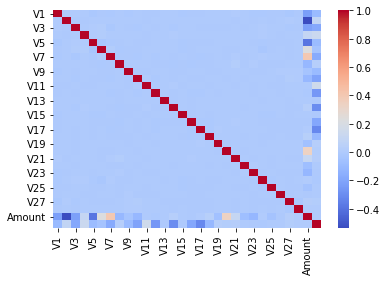

In [51]:
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')

In [54]:
X = data.drop(columns = ['Class'])
y = data['Class']
print(X.shape)
print(y.shape)

(275663, 29)
(275663,)


In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [57]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [58]:
dt = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [59]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [81]:
rf = RandomForestClassifier(max_depth = 5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
#decision tree uses whole dataset to build a single model,but RF randomly selects features and constructs multiple models

Accuracy Scores

In [63]:
print('Accuracy score of the Logistic Regression model is: {}'.format(accuracy_score(y_test, lr_pred)))
print('Accuracy score of the Decision Tree model is: {}'.format(accuracy_score(y_test, dt_pred)))
print('Accuracy score of the SVM model is: {}'.format(accuracy_score(y_test, svm_pred)))
print('Accuracy score of the Random Forest model is: {}'.format(accuracy_score(y_test, rf_pred)))

Accuracy score of the Logistic Regression model is: 0.9991475160067473
Accuracy score of the Decision Tree model is: 0.9993651714943863
Accuracy score of the SVM model is: 0.9993107576224766
Accuracy score of the Random Forest model is: 0.999419585366296


F1 scores

In [65]:
print('F1 score of the Logistic Regression model is: {}'.format(f1_score(y_test, lr_pred)))
print('F1 score of the Decision Tree model is: {}'.format(f1_score(y_test, dt_pred)))
print('F1 score of the SVM model is: {}'.format(f1_score(y_test, svm_pred)))
print('F1 score of the Random Forest model is: {}'.format(f1_score(y_test, rf_pred)))

F1 score of the Logistic Regression model is: 0.7006369426751593
F1 score of the Decision Tree model is: 0.7976878612716763
F1 score of the SVM model is: 0.7625000000000001
F1 score of the Random Forest model is: 0.8072289156626506


Confusion Matrix

In [80]:
lr_matrix  = confusion_matrix(y_test, lr_pred,  labels = [0,1])
print('Logistic Regression: \n{}'.format(lr_matrix))
print('------------------------------------------------------------------------')
dt_matrix  = confusion_matrix(y_test, dt_pred,  labels = [0,1])
print('Decision Tree: \n{}'.format(dt_matrix))
print('------------------------------------------------------------------------')
svm_matrix = confusion_matrix(y_test, svm_pred, labels = [0,1])
print('SVM: \n{}'.format(svm_matrix))
print('------------------------------------------------------------------------')
rf_matrix  = confusion_matrix(y_test, svm_pred, labels = [0,1])
print('Random Forest: \n{}'.format(rf_matrix))

Logistic Regression: 
[[55031     6]
 [   41    55]]
------------------------------------------------------------------------
Decision Tree: 
[[55029     8]
 [   27    69]]
------------------------------------------------------------------------
SVM: 
[[55034     3]
 [   35    61]]
------------------------------------------------------------------------
Random Forest: 
[[55034     3]
 [   35    61]]
